# Task 06 - Yash Amin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
data = pd.read_csv('iris.csv')

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# all column names in dataset
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# check for null values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
data.drop('Id',axis=1,inplace=True)
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualizations

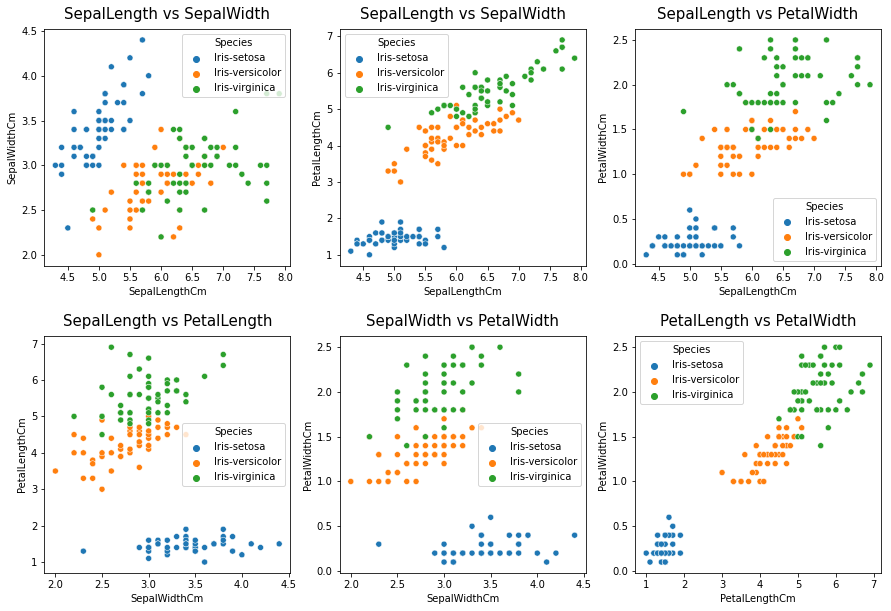

In [9]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.scatterplot(x=data['SepalLengthCm'], y=data['SepalWidthCm'], hue=data['Species'])
plt.title('SepalLength vs SepalWidth', fontsize=15, fontweight=10, pad='10')

plt.subplot(2,3,2)
sns.scatterplot(x=data['SepalLengthCm'], y=data['PetalLengthCm'], hue=data['Species'])
plt.title('SepalLength vs SepalWidth', fontsize=15, fontweight=10, pad='10')

plt.subplot(2,3,3)
sns.scatterplot(x=data['SepalLengthCm'], y=data['PetalWidthCm'], hue=data['Species'])
plt.title('SepalLength vs PetalWidth', fontsize=15, fontweight=10, pad='10')

plt.subplot(2,3,4)
sns.scatterplot(x=data['SepalWidthCm'], y=data['PetalLengthCm'], hue=data['Species'])
plt.title('SepalLength vs PetalLength', fontsize=15, fontweight=10, pad='10')

plt.subplot(2,3,5)
sns.scatterplot(x=data['SepalWidthCm'], y=data['PetalWidthCm'], hue=data['Species'])
plt.title('SepalWidth vs PetalWidth', fontsize=15, fontweight=10, pad='10')

plt.subplot(2,3,6)
sns.scatterplot(x=data['PetalLengthCm'], y=data['PetalWidthCm'], hue=data['Species'])
plt.title('PetalLength vs PetalWidth', fontsize=15, fontweight=10, pad='10')

plt.subplots_adjust(hspace=0.3)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

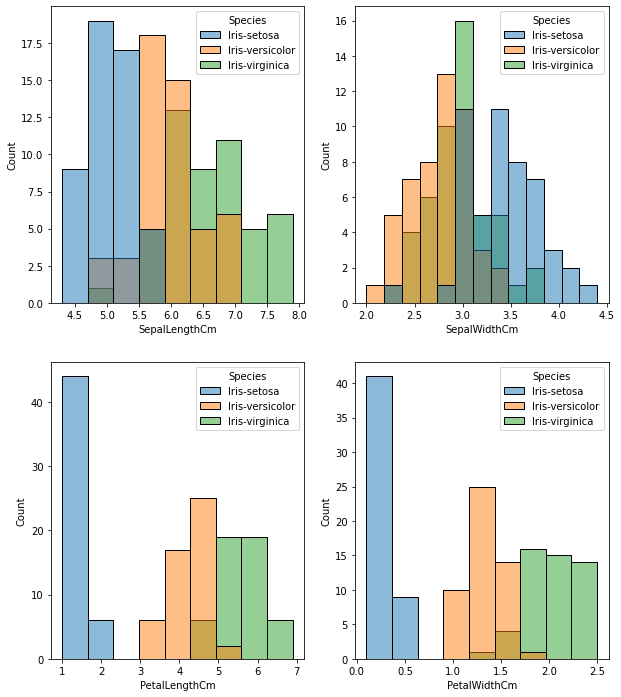

In [10]:
plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
sns.histplot(data=data, x='SepalLengthCm', hue='Species')

plt.subplot(2,2,2)
sns.histplot(data=data, x='SepalWidthCm', hue='Species')

plt.subplot(2,2,3)
sns.histplot(data=data, x='PetalLengthCm', hue='Species')

plt.subplot(2,2,4)
sns.histplot(data=data, x='PetalWidthCm', hue='Species')

In [11]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


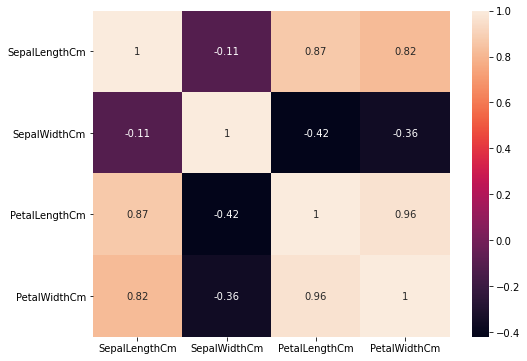

In [12]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()

# Training Decision Tree Classifier

In [13]:
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [14]:
X = data[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = data[['Species']]
# split data into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=3)

In [15]:
# create model
clf = DecisionTreeClassifier(random_state=42)
# train model
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

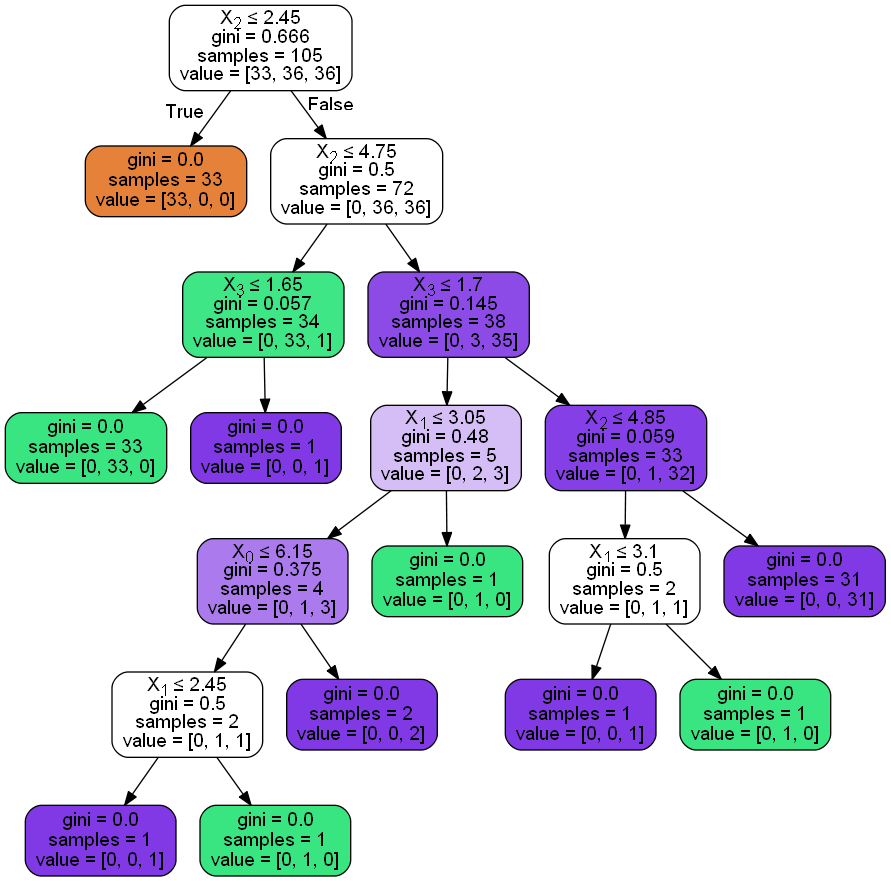

In [17]:
# visualize trained model
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
# predict using trained model
Y_pred=clf.predict(X_test)
print(Y_pred)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
# check accuracy score
accuracy_score(Y_test,Y_pred)

0.9111111111111111

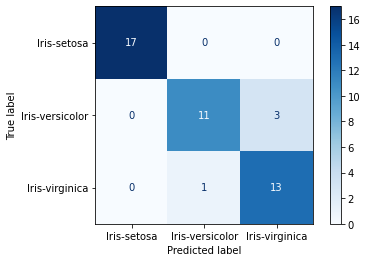

In [21]:
# visualize preicted data using confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test, cmap=plt.cm.Blues)